In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [8]:
#General parameters
years = 2
dt = 15
time = int(261 * years)

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "fixed_gain_phase"
#mode = "fixed_return"
 

#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = [30,5,5,1]
time_after_reversel = 0
smooth_period = 20

trade_cost = [0,0]
spread = 0.00
asset_cost = 0.02
tax_rate = 0.25
tax_allowance = 1000

initial_investment = 5000
saving_plan_period = 22
saving_plan = 500
#saving_plan = {1: 50, 73:60, 85:500, 97:1000, 133:2000, 205:2500, 265:3000, 325:3500, 385:4000, 445:4500, 505:5000}
#saving_plan = {1: 50, 73:60, 85:500, 97:1000, 133:2000, 205:2500, 265:3000, 325:3500, 385:4000, 445:4500, 505:5000}
#saving_plan = {12*i+1: 500 * 1.02**(i*12) for i in range(0,years)}


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, 
                      trade_cost=trade_cost, spread=spread, asset_cost=asset_cost, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold()[0]
random_swing_performance_analyse = sim.random_swing_trade()[0]
swing_performance = sim.swing_trade()[0]

AttributeError: 'ChartSimulation' object has no attribute 'swing_ttwror'

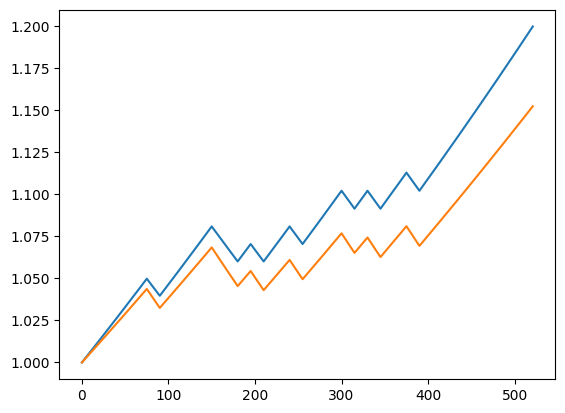

In [9]:
plt.plot(sim.performance/sim.initial_investment, label="Performance")
plt.plot(sim.buy_and_hold_ttwror, label="Buy and hold")
plt.plot(sim.swing_ttwror, label="Swing trade")
plt.plot(sim.random_swing_ttwror, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title("True Time Weighted Rate of Return (TTWROR)")

plt.grid()
plt.legend()

plt.show()


In [ ]:
plt.plot(sim.performance, label="Simulation")
plt.plot(sim.investet_over_time, label="Investment over time")
plt.plot(sim.buy_and_hold_performance, label="Buy and hold")
plt.plot(sim.swing_performance, label="Swing trade")
plt.plot(sim.random_swing_performance, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=1)
#sim.plot_performance()

In [ ]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=2000)

# mc.hist_performance(bins=30)

In [ ]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=1)